#This is solution for F part

In [0]:
from scipy.signal import place_poles
import numpy as np
from math import pi, sqrt, sin, cos
from control import root_locus, ss, pole, zero
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
! pip install control

In [0]:
# different initial conditions
y0 = np.array([[0],[0],[0],[0]])
# y0 = np.array([0.57/2,pi/6,0,0])
# y0 = np.array([sqrt(3)*0.57/2,pi/3,0,0])
# y0 = np.array([sqrt(3)*0.57/2,pi/3,0.3,0.5])

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [0, 2.283, 0, 0],
              [0, 21.216, 0, 0]])

B = np.array([[0],[0], [0.0862], [0.1512]])

# desired poles
P = np.array([-1, -1.1, -1.2, -1.3])

C_x = np.array([1, 0, 0, 0])
С_theta = np.array([0, 1, 0, 0])
D = np.array([0])

time = np.linspace(0,100,10000)

In [0]:
# control matrix which is needed for these poles
K = place_poles(A, B, P).gain_matrix

[ 0.          0.          4.60608293 -4.60608293] [-4.14867211+0.j  4.14867211+0.j]


(array([[-4.60608293e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,  4.60608293e+00+0.00000000e+00j],
        [-4.60608293e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,  4.60608293e+00+0.00000000e+00j],
        [-4.14867211e+00+0.00000000e+00j,  3.55579277e+10+1.14433246e+12j,
          4.14867211e+00+0.00000000e+00j,  3.55579277e+10-1.14433246e+12j],
        [-4.14867211e+00+0.00000000e+00j,  7.11158554e+10+1.61754902e+12j,
          4.14867211e+00+0.00000000e+00j,  7.11158554e+10-1.61754902e+12j],
        [-4.14867210e+00+0.00000000e+00j,  1.06673783e+11+1.98012731e+12j,
          4.14867210e+00+0.00000000e+00j,  1.06673783e+11-1.98012731e+12j],
        [-4.14867211e+00+0.00000000e+00j,  1.42231711e+11+2.28534784e+12j,
          4.14867211e+00+0.00000000e+00j,  1.42231711e+11-2.28534784e+12j],
        [-4.14867211e+00+0.00000000e+00j,  2.84463422e+11+3.22570454e+12j,
          4.1486721

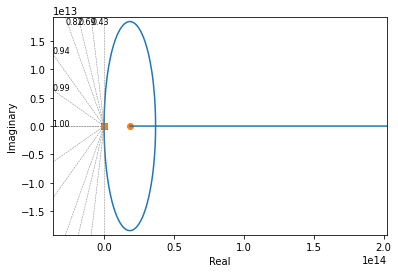

In [0]:
sys_x = ss(A, B, C_x, D)
sys_theta = ss(A, B, С_theta, D)
print(pole(sys), zero(sys))
root_locus(sys_x)


(array([[-4.60608293e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          4.60608293e+00+0.00000000e+00j],
        [-4.40179926e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          4.40179926e+00+0.00000000e+00j],
        [-4.18756176e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          4.18756176e+00+0.00000000e+00j],
        [-3.96175595e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          3.96175595e+00+0.00000000e+00j],
        [-3.72227712e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          3.72227712e+00+0.00000000e+00j],
        [-3.46629250e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          3.46629250e+00+0.00000000e+00j],
        [-3.18983078e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          3.18983078e+00+0.00000000e+00j],
        [-2.88701527e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          2.88701527e+00+0.00000000e+00j],
        [-2.54846893e+00+0.00000000e+00j,  0.00000000e+0

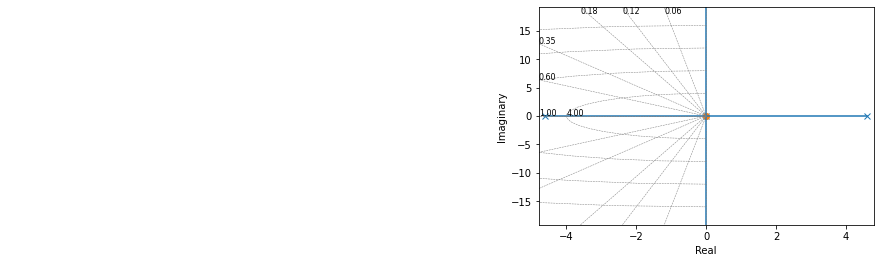

In [0]:
root_locus(sys_theta)

**Analyses of  the roor locus**  
From the root locus graphs for x and for theta outputs we can see that poles for *theta* are marginally stable. But root locus for *x* is unstable because, first, it has both negative and positive real poles, which are symmetric to immaginary axe, but it also has big positive zero. Hence, based on these we can say that we need the feedback, which will first fix the zero and after this shift poles to the negative side a bit.

In [0]:
def for_ode(x, t):
  x= x.reshape((4,1))
  x_new= A.dot(x)-(B.dot(K)).dot(x)
  return x_new.reshape((4,))

def draw(x, t):
  lines=plt.plot(t, x)
  plt.xlabel('time')
  plt.ylabel('amplitude')
  plt.title("Solution of linearized system")
  plt.legend(lines, ('x', 'theta', 'x\'','theta\'' ))

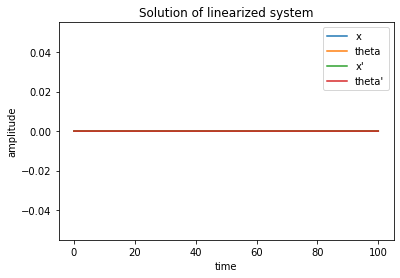

In [0]:
y0=np.array([0,0,0,0])
res = odeint(for_ode, y0, time)
draw(res, time)

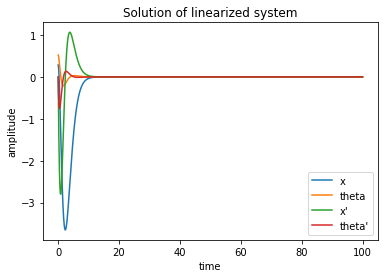

In [0]:
y0 = np.array([0.57/2,pi/6,0,0])
res = odeint(for_ode, y0, time)
draw(res, time)

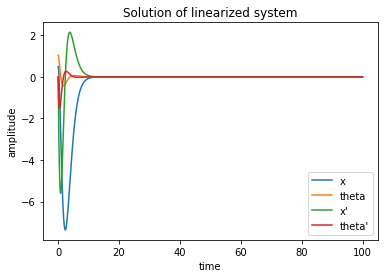

In [0]:
y0 = np.array([sqrt(3)*0.57/2,pi/3,0,0])
res = odeint(for_ode, y0, time)
draw(res, time)

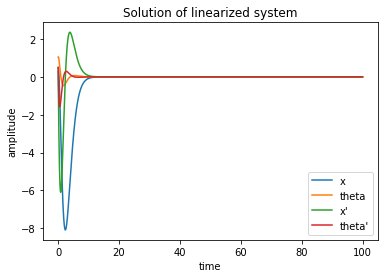

In [0]:
y0 = np.array([sqrt(3)*0.57/2,pi/3,0.3,0.5])
res = odeint(for_ode, y0, time)
draw(res, time)

**Conclusion**  
We can see that the controller works and system goes to stable regime in around 20 seconds from the begining. It does not go out of the stable regime.  The more is the initial deviation, the more will be the maximum one but the values of the derivatives in the initial vector also influence and may increase the deviation. The controller has big overshoot and rather big time transient process time, but very small rise time, the steady error is very small (e^-15).

#This is solution for G part

In [0]:
from __future__ import division, print_function
import numpy as np
import scipy.linalg

# Q and R are control matrixes
def lqr(A,B,Q,R):
#solve the ricatti equation
  X = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))
# K= LQR gain
# this one if R be square non 1 by 1 matrix 
# K = np.matrix(scipy.linalg.inv(R)*(B.T*X))
  K = (1/R)*np.matrix((B.T*X))
  eigVals, eigVecs = scipy.linalg.eig(A-B*K)
  return K, X, eigVals
 

In [0]:
Q = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 100]])

R = 0.01

In [0]:
k, x, eigs = lqr(A,B, Q, R)

In [0]:
def for_ode_lqr(x, t):
  # print(np.asarray(x).shape)
  x= x.reshape((4,1))
  x_new= np.array(A.dot(x)-(B.dot(k)).dot(x))
  x_new = x_new.reshape((4,))
  # print(x_new.shape)
  return x_new

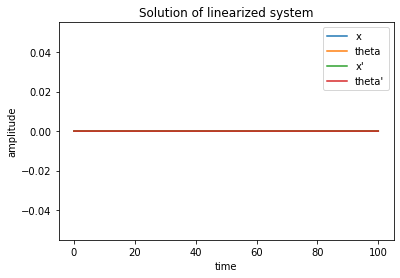

In [0]:
y0=[0,0,0,0]
res = odeint(for_ode_lqr, y0, time)
draw(res, time)

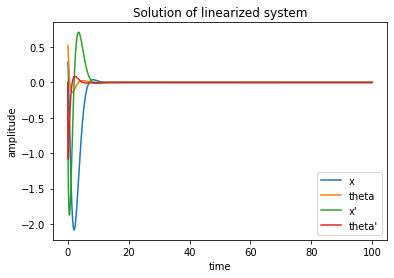

In [0]:
y0 = np.array([0.57/2,pi/6,0,0])
res = odeint(for_ode_lqr, y0, time)
draw(res, time)

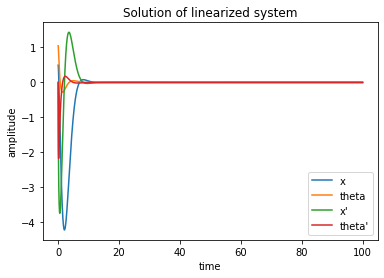

In [0]:
y0 = np.array([sqrt(3)*0.57/2,pi/3,0,0])
res = odeint(for_ode_lqr, y0, time)
draw(res, time)

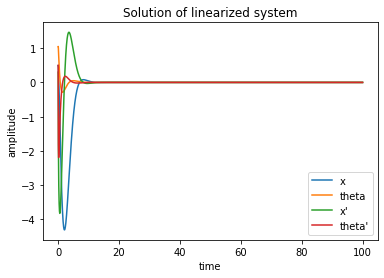

In [0]:
y0 = np.array([sqrt(3)*0.57/2,pi/3,0.3,0.5])
res = odeint(for_ode_lqr, y0, time)
draw(res, time)

**Conclusion**  
 The controller has big overshoot, but it is 2 time less than for pole placement controller from the previous step Transient time process time has also decreased twice, the rise time is also still small, the steady error has become bigger (e^-13) but still neglectable.